<a href="https://colab.research.google.com/github/yashraj01-se/Machine_learning_important_concepts/blob/main/Linear_regression_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Preparing and visualizing dataset:

In [27]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [28]:
weight=0.8
bias=0.2
start=0
end=1
step=0.02
x=torch.arange(start,end,step)
y=weight*x+bias
print("Dataset:",x[:])
print("labels:",y[:])

Dataset: tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])
labels: tensor([0.2000, 0.2160, 0.2320, 0.2480, 0.2640, 0.2800, 0.2960, 0.3120, 0.3280,
        0.3440, 0.3600, 0.3760, 0.3920, 0.4080, 0.4240, 0.4400, 0.4560, 0.4720,
        0.4880, 0.5040, 0.5200, 0.5360, 0.5520, 0.5680, 0.5840, 0.6000, 0.6160,
        0.6320, 0.6480, 0.6640, 0.6800, 0.6960, 0.7120, 0.7280, 0.7440, 0.7600,
        0.7760, 0.7920, 0.8080, 0.8240, 0.8400, 0.8560, 0.8720, 0.8880, 0.9040,
        0.9200, 0.9360, 0.9520, 0.9680, 0.9840])


In [29]:
data_split=int(0.8*len(x))
X_train,y_train=x[:data_split],y[:data_split]
X_test,y_test=x[data_split:],y[data_split:]
print(len(X_train),len(y_train),len(X_test),len(y_test))

40 40 10 10


In [30]:

def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    prediction=None):
  plt.figure(figsize=(10,7))
#plot the training data:
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")
#plot the testing data:
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")
#now if prediction:
  if prediction is not None:
    plt.scatter(test_data,prediction,c="r",s=4,label="Prediction")
  plt.legend()
  plt.grid()
  plt.show()


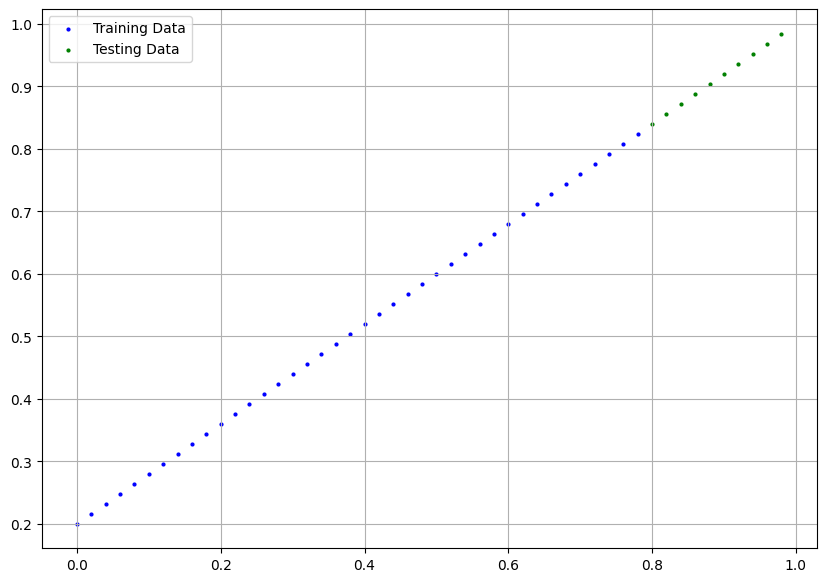

In [31]:
plot_prediction(X_train,y_train,X_test,y_test)

#Prediction without training any model:

# Step 2: Model Creation:

In [32]:
torch.manual_seed(42)
class Linearregression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x):
    return self.weight*x+self.bias

model_0=Linearregression()
print("Parameters of Model:",model_0.state_dict())

Parameters of Model: OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


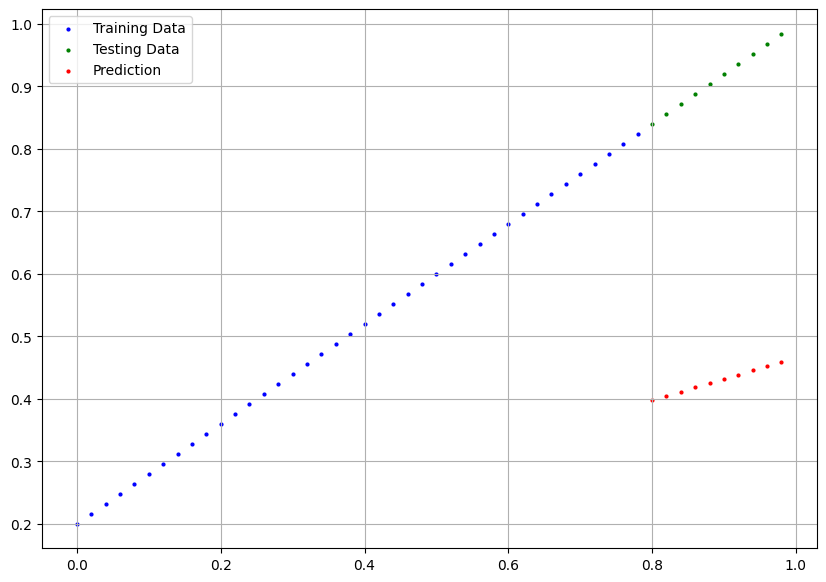

In [33]:
model_0.eval()
with torch.inference_mode():
  y_pred=model_0(X_test)

plot_prediction(X_train,y_train,X_test,y_test,y_pred)

#Step 3: Loss function and Optimizer:

In [34]:
Loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

# Step 3 : Training and testing loop:

In [35]:
epoch_count=[]
train_value=[]
test_value=[]
def train_test_loop(epochs,model,X_train,Y_train,x_test,Y_test,loss_function,optimizer,epoch_count,train_value,test_value):
  torch.manual_seed(42)
  for epoch in range(epochs):
    model_0.train()
    train_pred=model_0(X_train)
    train_loss=Loss_fn(train_pred,y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
      test_pred=model_0(X_test)
      test_loss=Loss_fn(test_pred,y_test)


      if epoch%10==0:
        print(f"Epoch: {epoch} , Training Loss : {train_loss:.4f} ,Testing Loss : {test_loss:.4f}")
        epoch_count.append(epoch)
        train_value.append(train_loss)
        test_value.append(test_loss)

In [36]:
train_test_loop(epochs=230,
                model=model_0,
                X_train=X_train,Y_train=y_train,x_test=X_test,Y_test=y_test,
                loss_function=Loss_fn,optimizer=optimizer,
                epoch_count=epoch_count,train_value=train_value,test_value=test_value)

Epoch: 0 , Training Loss : 0.2519 ,Testing Loss : 0.4701
Epoch: 10 , Training Loss : 0.1419 ,Testing Loss : 0.3399
Epoch: 20 , Training Loss : 0.0904 ,Testing Loss : 0.2502
Epoch: 30 , Training Loss : 0.0736 ,Testing Loss : 0.1987
Epoch: 40 , Training Loss : 0.0671 ,Testing Loss : 0.1696
Epoch: 50 , Training Loss : 0.0630 ,Testing Loss : 0.1525
Epoch: 60 , Training Loss : 0.0596 ,Testing Loss : 0.1415
Epoch: 70 , Training Loss : 0.0561 ,Testing Loss : 0.1304
Epoch: 80 , Training Loss : 0.0526 ,Testing Loss : 0.1222
Epoch: 90 , Training Loss : 0.0492 ,Testing Loss : 0.1146
Epoch: 100 , Training Loss : 0.0458 ,Testing Loss : 0.1063
Epoch: 110 , Training Loss : 0.0423 ,Testing Loss : 0.0980
Epoch: 120 , Training Loss : 0.0389 ,Testing Loss : 0.0905
Epoch: 130 , Training Loss : 0.0355 ,Testing Loss : 0.0822
Epoch: 140 , Training Loss : 0.0320 ,Testing Loss : 0.0739
Epoch: 150 , Training Loss : 0.0286 ,Testing Loss : 0.0663
Epoch: 160 , Training Loss : 0.0252 ,Testing Loss : 0.0581
Epoch: 1

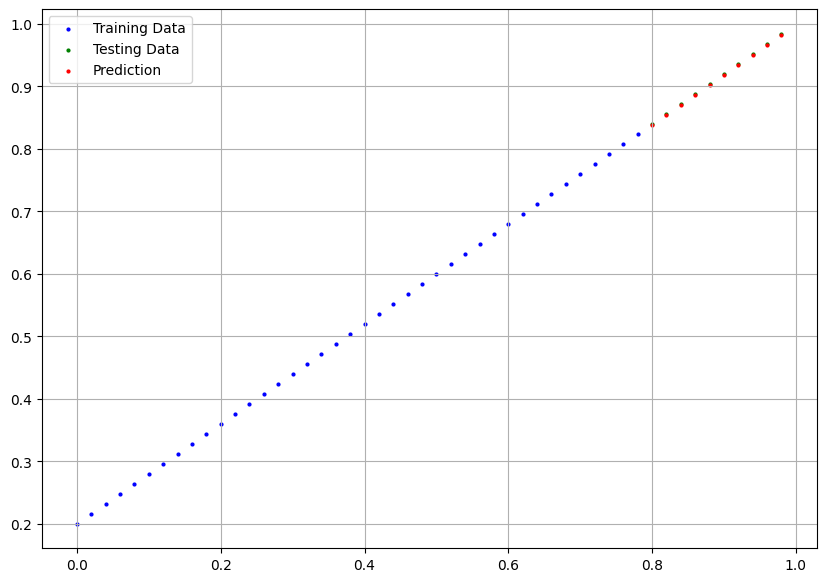

In [37]:
with torch.inference_mode():
  y_pred=model_0(X_test)

plot_prediction(X_train,y_train,X_test,y_test,y_pred)

In [38]:
import numpy as np
def plot_loss_convergence(epoch_count,
                          train_value,
                          test_value):
  plt.figure(figsize=(10,6))
  plt.plot(epoch_count,np.array(torch.tensor(train_value).numpy()),label="Training loss")
  plt.plot(epoch_count,np.array(torch.tensor(test_value).numpy()),label="Testing loss")
  plt.xlabel("epochs")
  plt.ylabel("Values")
  plt.title("Training vs Testing Covergence")
  plt.legend()
  plt.show()

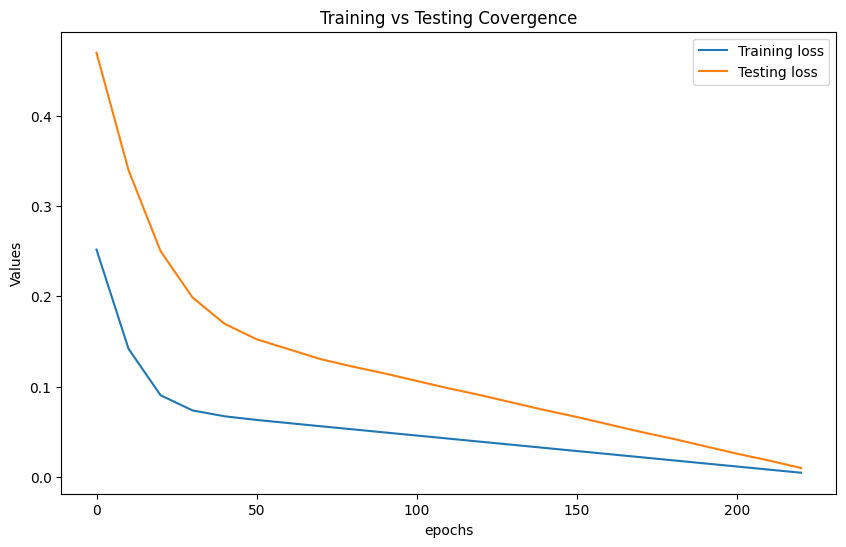

In [39]:
plot_loss_convergence(epoch_count=epoch_count,train_value=train_value,test_value=test_value)